This notebook will walk through some example plotting code for cortical surfaces and subcortical

In [1]:
import pandas as pd
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt

from Neuro_Plotting.Ref import SurfRef, VolRef, load_mapping, save_mapping
from Neuro_Plotting.Plot import Plot_Surf, Plot_Surf_Collage, Plot_SurfVol_Collage
from nilearn.plotting import plot_glass_brain, plot_stat_map

## Setup

For the ROI helper refs to work, you need to point them towards the directory where some useful data is stored. This will be wherever you installed the Neuro_Plotting library.

In [2]:
data_dr = '/home/sage/Neuro_Plotting/data/'

Next, use pandas to read in your ROIs of interest, note that right now Neuro_Plotting supports either pandas dataframes where one column is the name of the ROI and one column is the value, or a python dictionary where the keys are the names of the ROIs and the values are the names of the values

In [3]:
rois = pd.read_csv('example_rois.csv')

If we look at the loaded ROIs we will see that there are a number of variables, there are thickness and area surface values, subcortical volumes, DTI tracts and some co-variates. Neuro_Plotting can handle everything but the DTI tracts, and cannot handle plotting co-variates...


Let's start by plotting some surface values with increasing complexity. First create a "surface reference", you should provide the surf_ref the data_dr we defined before and then two additional params. There are the name of the space to plot in (e.g., fsaverage or fsaverage5, though for specific spaces avaliable to plot in go into the top level of the data_dr, and the avaliable spaces are directories. Note I plan to support more spaces and parcellations in the future). 

And then if you plan on plotting ROIs as this example assumes, you need to pass the name of the parcellation scheme you are using. Note: if you are not plotting values by ROI, you can just skip providing a "parc" value. Otherwise to see which parcellations are supported in each space, you can enter the spaces directory in the data dr and then enter its corresponding label dr. The names of the supported parcellations are for example 'desikan' or 'destr' right now. 

In [4]:
surf_ref = SurfRef(data_dr, space='fsaverage5', parc='desikan')

Next you will call the method get_hemis_plot_vals from the surf ref you have created. Specifically you provide this function the dataframe or dictionary with the ROI values, the str indicator that a parcel is left hemisphere and right hemisphere, i.e., all ROI names should have some unique way of listing if it is left or right hemisphere. Then two optional parameters, i_keys and d_keys which should be used to select a specific set of ROIs. 

i_keys work as, ROIs will be selected from the full collection of ROIs only if each substring passed to i_keys is present in all of the ROI names. For example, if all ROIs of interest have thickness in their name, we just pass 'thickness'. 

d_keys acts as a way of further filtering results. Say for example you had rois called 'thickness' and 'alternate.thickness'. With just i_keys you could select only 'alternate.thickness', but you would have no way of selecting just 'thickness'. In this case you case pass d_keys, where any value passed to d_keys if present in any of the selected ROI names will actually be dropped. So for example, if you pass 'alternate' as a d_key and 'thickness' as an i_key, you would select just the ROIs with only 'thickness' in their name, and not those with both thickness and alternate.

In [5]:
thickness = surf_ref.get_hemis_plot_vals(rois, 'lh_', 'rh_', i_keys=['thickness'])
area = surf_ref.get_hemis_plot_vals(rois, 'lh_', 'rh_', i_keys=['area'])

Notable by calling get_hemi_plot_vals, a list is returned, where the first element is the left hemisphere and the second is the right hemisphere.

Next, the simplest plotting function is mostly just a wrapper around the base nilearn function plot_surf. Please therefore see the nilearn docs https://nilearn.github.io/modules/generated/nilearn.plotting.plot_surf.html for info on most of the different arguments. These base arguments can be used for most of he different plotting functions presented. The notable difference though between Plot_Surf and nilearn's plot_surf, is that instead of passing the surf_mesh, surf_map and bg_map params, you instead pass data as your data to plot, ref as the surf ref object, and then two more params, surf_mesh as a string (i.e. 'inflated' or 'pial') and bg_map also as a string, e.g. 'sulc' or None. Specifically, surf mesh should be the string name of a valid geometry file in the selected spaces sub surf director, and bg_map should be an array of values also present in the selected spaces sub surf dr. The rest of the parameters are the same as the base nilearn function  (Actually there are a few extra params I added, midpoint, for customizing where the midpoint in a colorbar lands, and dist, which controls how zoomed a view on the brain is plotted).

## Plot single surface

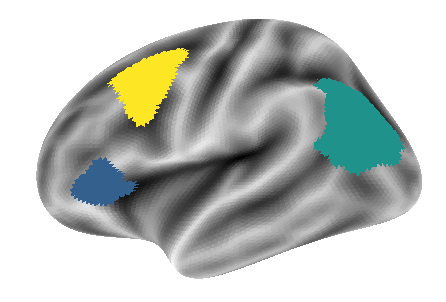

In [6]:
figures, axes, smf = Plot_Surf(thickness[0], surf_ref, hemi='lh', threshold=.01, avg_method='median')

## Plot collage of surfaces

The next function / tool of interest is for plotting a collage of different surface views

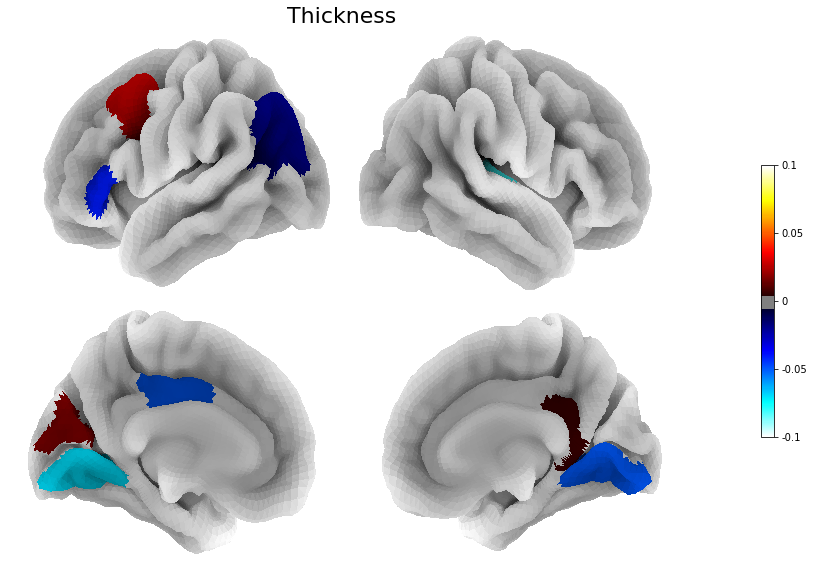

In [7]:
# Most of these params are default, just showing more than needed as an example
figure, axes, smf = Plot_Surf_Collage(data = thickness,
                                      ref = surf_ref,
                                      surf_mesh = 'pial',
                                      bg_map = 'sulc',
                                      view = 'standard',
                                      cmap = 'cold_hot',
                                      title = 'Thickness',
                                      title_sz = 22,
                                      vmax = .1,
                                      vmin = -.1,
                                      threshold = .005,
                                      wspace = 0,
                                      hspace = 0,
                                      figsize = (15, 10),
                                      midpoint = None,
                                      avg_method = 'median',
                                      bg_on_data = True,
                                      alpha = 1,
                                      colorbar = True)

# This is how you save a figure! Just uncomment
#plt.savefig('Thickness.png', dpi=300)

Here's now plotting the area, with some different choices

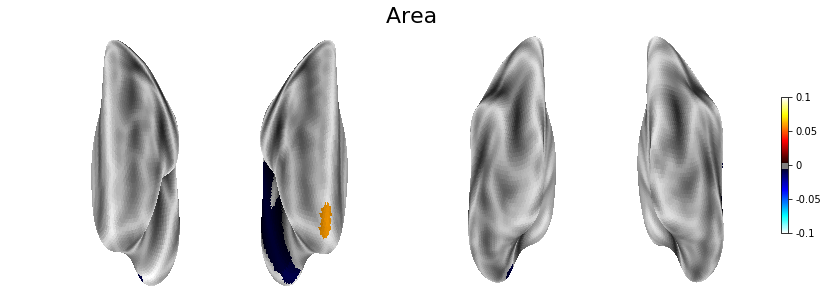

In [8]:
figure, axes, smf = Plot_Surf_Collage(area, surf_ref,
                                      cmap='cold_hot',
                                      surf_mesh='inflated',
                                      vmax = .1,
                                      vmin = -.1,
                                      view='fb',
                                      threshold = .005,
                                      wspace=-.4,
                                      hspace=0,
                                      figsize=(15, 5),
                                      title='  Area',
                                      title_sz=22,
                                      avg_method='median',
                                      bg_on_data=True,
                                      alpha=1,
                                      colorbar=True)

#plt.savefig('Area.png', dpi=300)

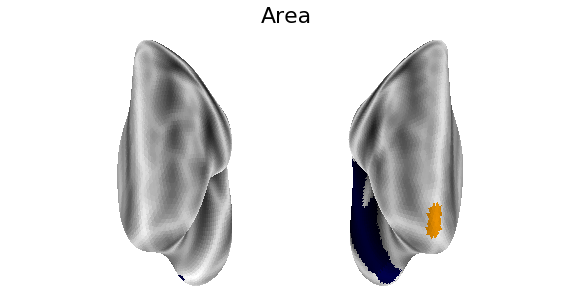

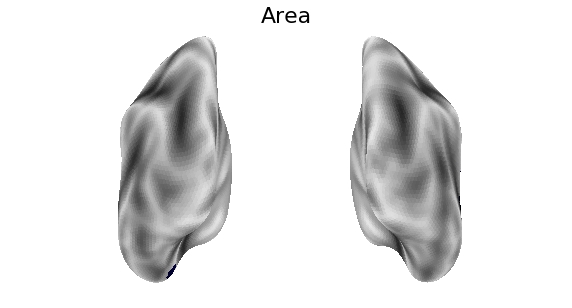

In [15]:
for view in ['front', 'back']:

    figure, axes, smf = Plot_Surf_Collage(area, surf_ref,
                                          cmap='cold_hot',
                                          surf_mesh='inflated',
                                          vmax = .1,
                                          vmin = -.1,
                                          view=view,
                                          threshold = .005,
                                          wspace=-.3,
                                          hspace=0,
                                          figsize=(10, 5),
                                          title=' Area',
                                          title_sz=22,
                                          avg_method='median',
                                          bg_on_data=True,
                                          alpha=1)

Now onto plotting volume. Simmilar to surface, we have a vol_ref, with a space and a parc param.

In [ ]:
vol_ref = VolRef(data_dr, space='mni', parc='aseg')

Also simmilar, we have a method to 'get plot vals'

In [ ]:
volume = vol_ref.get_plot_vals(rois, i_keys=['_volume'])

The output of get plot vals actually creates a nifti volume ready for plotting with nilearns functions directly. Just pass volume directly!

https://nilearn.github.io/modules/generated/nilearn.plotting.plot_glass_brain.html
https://nilearn.github.io/modules/generated/nilearn.plotting.plot_stat_map.html

In [ ]:
plot_glass_brain(volume, cmap='cold_hot', 
                 vmax=.1,
                 threshold=.005,
                 symmetric_cbar=True,
                 plot_abs=False,
                 colorbar=True)


#plt.savefig('Glass_Brain.png', dpi=300)

plot_stat_map(volume,
              vmax=.1,
              threshold=.005,
              symmetric_cbar=True,
              cmap='cold_hot',
              draw_cross=False)

#plt.savefig('Slices.png', dpi=300)

Next, we will look at plotting combinations of surface and volume. Note for the below plot, tweaking the figsize along with the different spacing params will effect how 'squished' the brains are. You'll likely need to expiriment a bit.

In [ ]:
# One important note is to not pass any repeated arguments, for example
# Dont pass vmin or vmax in either surf or vol params... 

surf_params = {'ref': surf_ref,
               'surf_mesh': 'pial',
               'bg_map': 'sulc',
               'view': 'standard',
               'avg_method': 'median',
               'bg_on_data': True,
               'alpha': 1,
               'colorbar': False}

vol_params = {'symmetric_cbar': True,
              'plot_abs': False,
              'colorbar': False}

figure, _ = Plot_SurfVol_Collage(thickness,
                                 volume,
                                 vol_plot_type = 'glass',
                                 cmap = 'cold_hot',
                                 threshold = .005,
                                 vmin = -.1,
                                 vmax = .1,
                                 hspace = -.2,
                                 figsize = (10, 10),
                                 title = 'Surf and Volume',
                                 colorbar = True,
                                 surf_params = surf_params,
                                 vol_params = vol_params)

Alternate space example, w/ gordon networks

In [ ]:
rois = {'lh_auditory': .05,
        'rh_auditory': .05,
        'lh_smmouth': .02}

surf_ref = SurfRef(data_dr, space='32k_fs_LR', parc='gordon_net')
thickness = surf_ref.get_hemis_plot_vals(rois, 'lh_', 'rh_')

# Most of these params are default, just showing more than needed as an example
figure, axes, smf = Plot_Surf_Collage(data = thickness,
                                      ref = surf_ref,
                                      surf_mesh = 'very_inflated',
                                      bg_map = 'sulc_conte',
                                      view = 'standard',
                                      cmap = 'cold_hot',
                                      title = 'Networks',
                                      title_sz = 22,
                                      vmax = .1,
                                      vmin = -.1,
                                      threshold = .005,
                                      avg_method = 'median',
                                      bg_on_data = True,
                                      alpha = 1,
                                      darkness=.5,
                                      colorbar = True)